# Bibliotheken


Fehler beim Auswerten von AAPL: name 'AAPL' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von AAPL: name 'AAPL' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von AAPL: name 'AAPL' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von AAPL: name 'AAPL' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von AAPL: name 'AAPL' is not defined.  Zurückgeben von NaN.


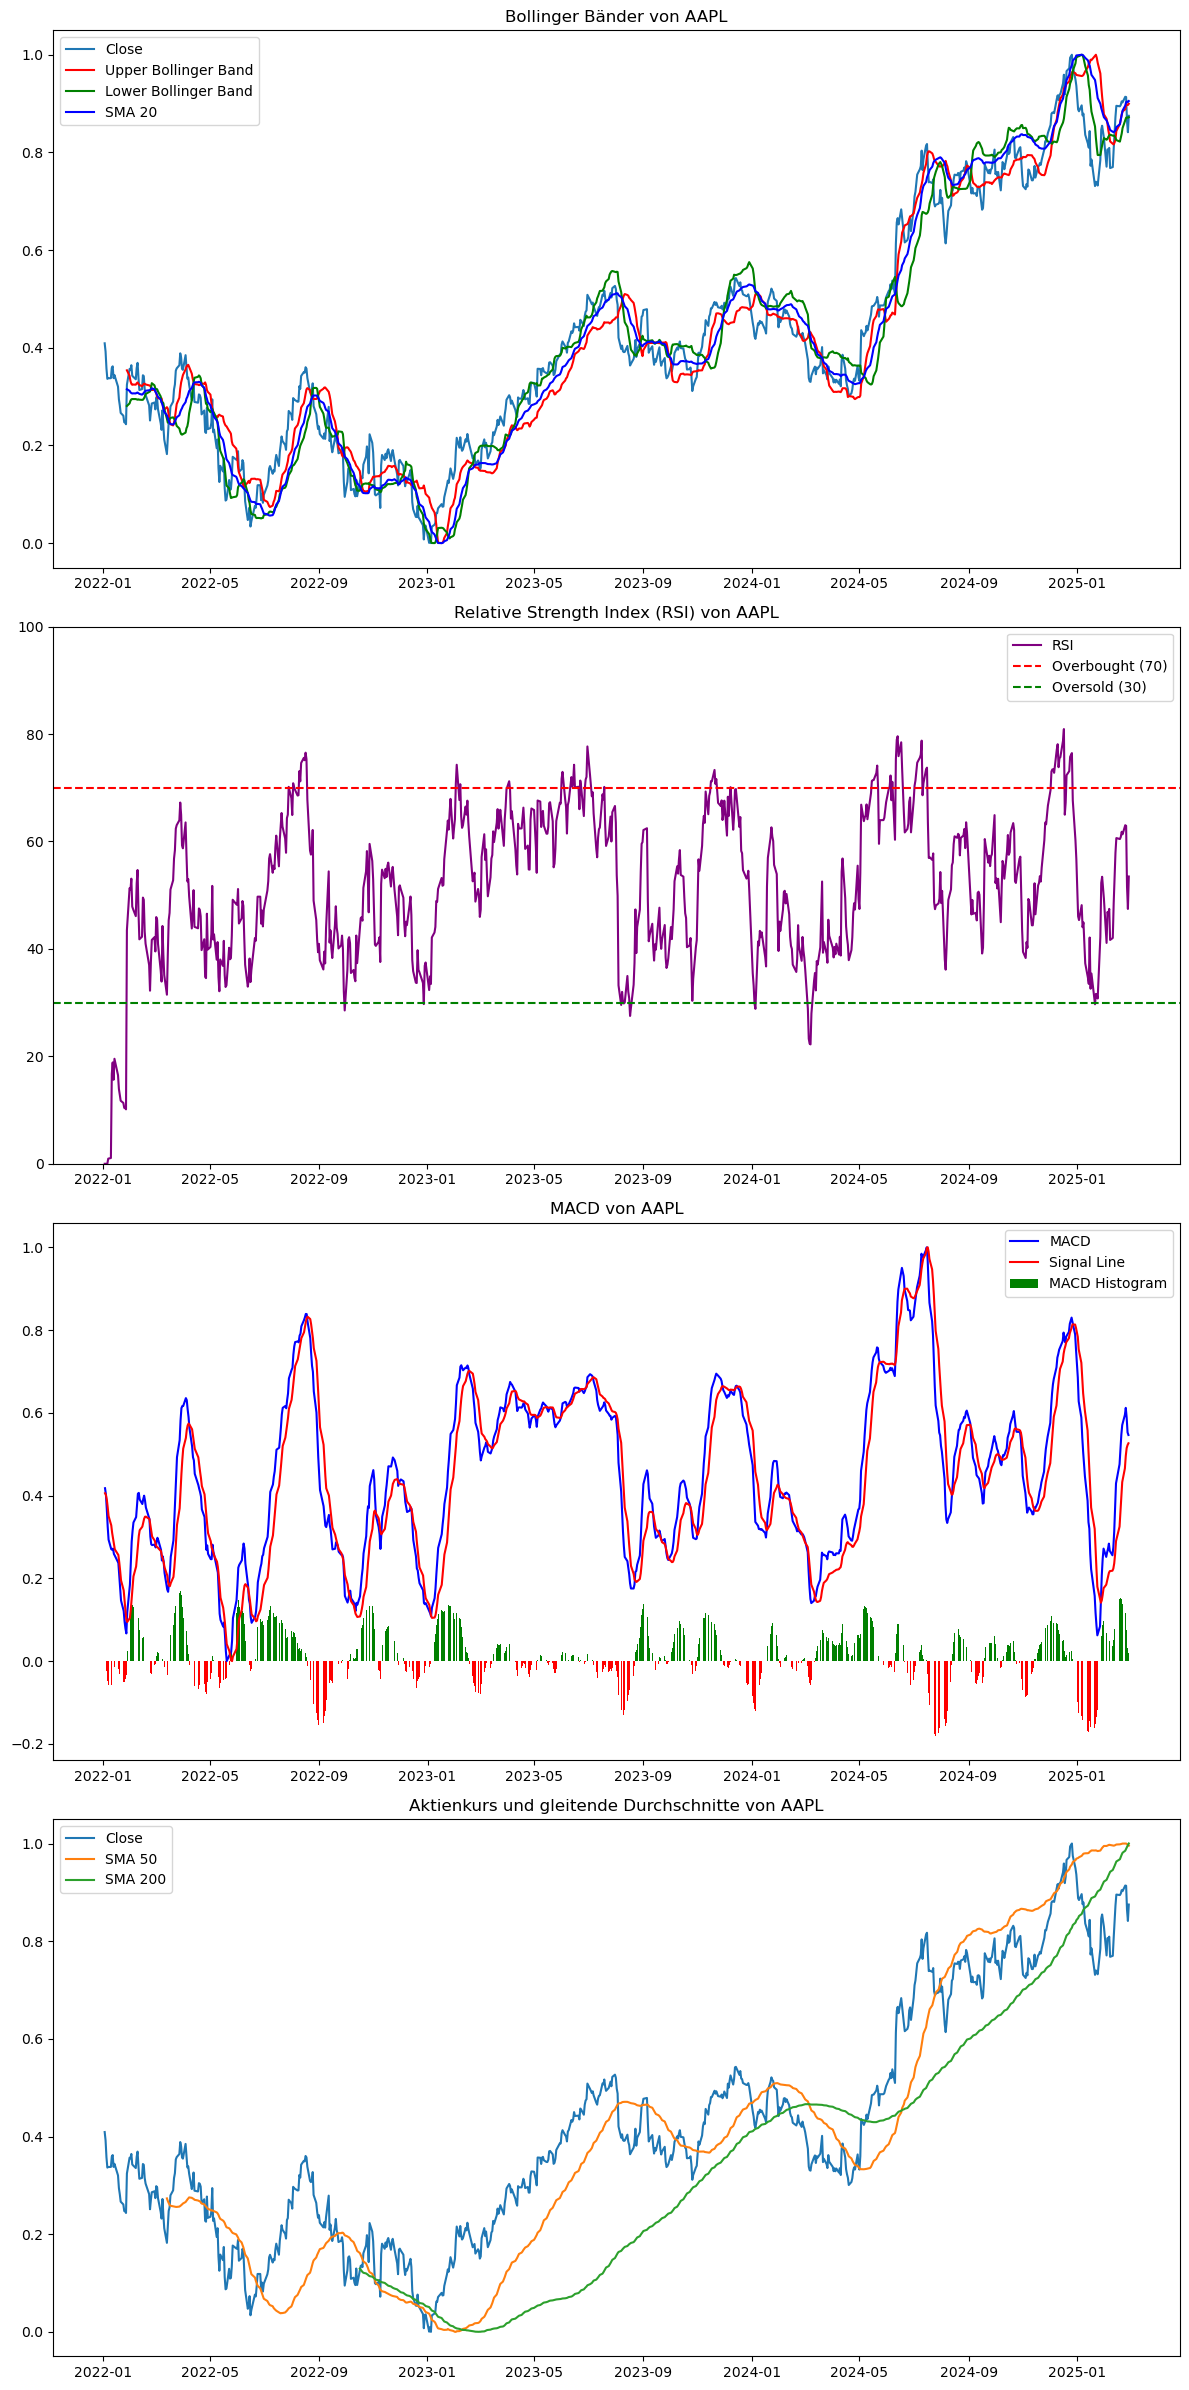

Fehler beim Auswerten von *10**6SFT: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von *10**6SFT: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von *10**6SFT: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von *10**6SFT: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von *10**6SFT: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.


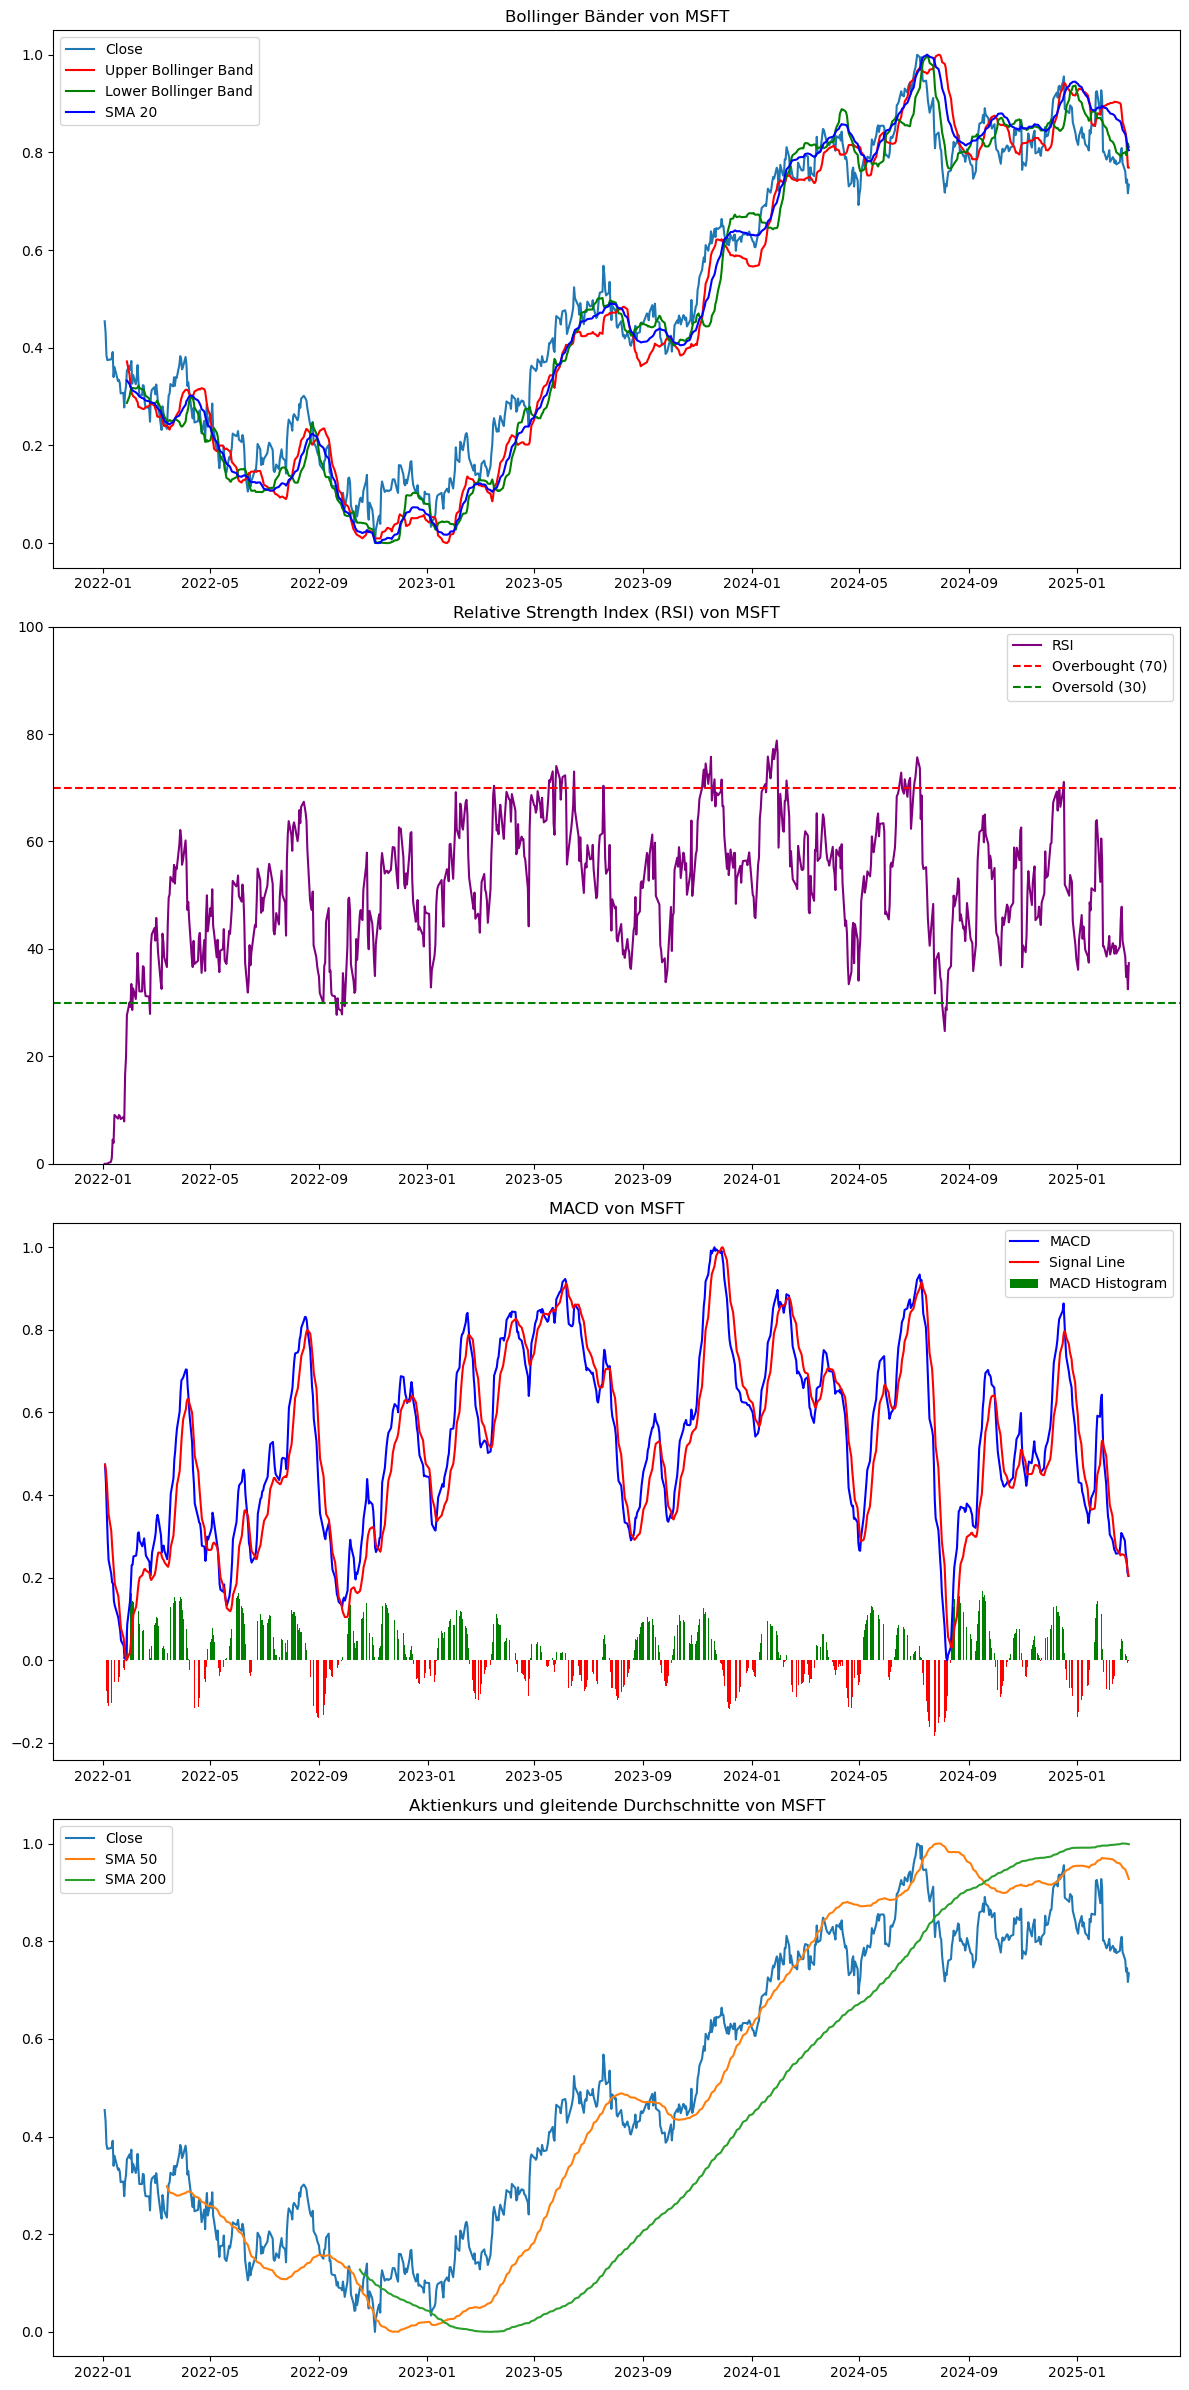

Fehler beim Auswerten von GOOG: name 'GOOG' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von GOOG: name 'GOOG' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von GOOG: name 'GOOG' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von GOOG: name 'GOOG' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von GOOG: name 'GOOG' is not defined.  Zurückgeben von NaN.


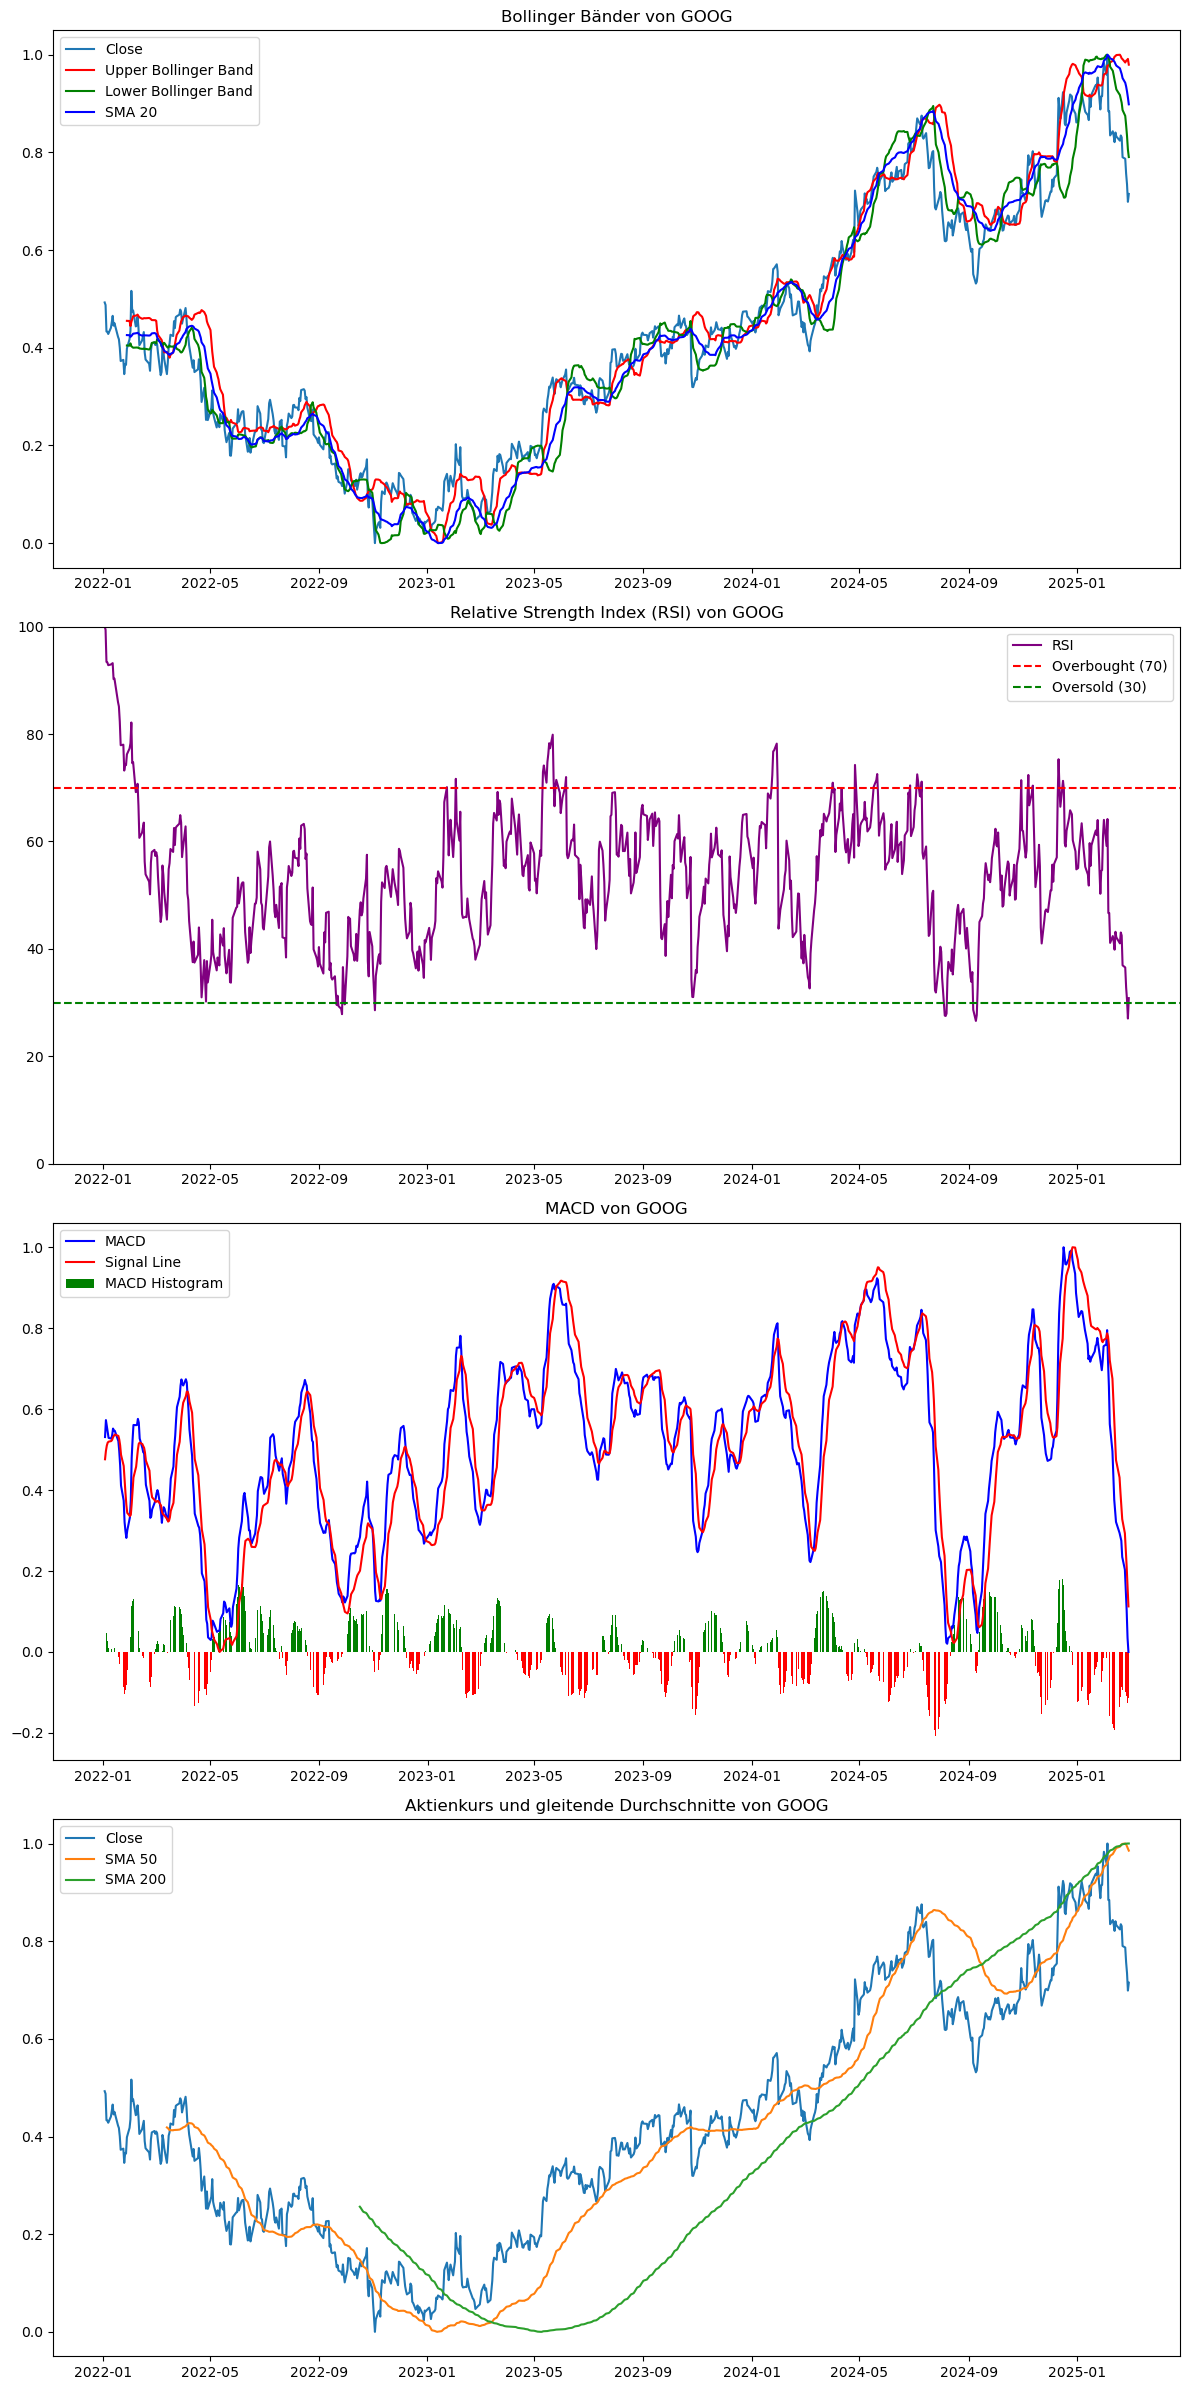

Fehler beim Auswerten von ACWI: name 'ACWI' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von ACWI: name 'ACWI' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von ACWI: name 'ACWI' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von ACWI: name 'ACWI' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von ACWI: name 'ACWI' is not defined.  Zurückgeben von NaN.


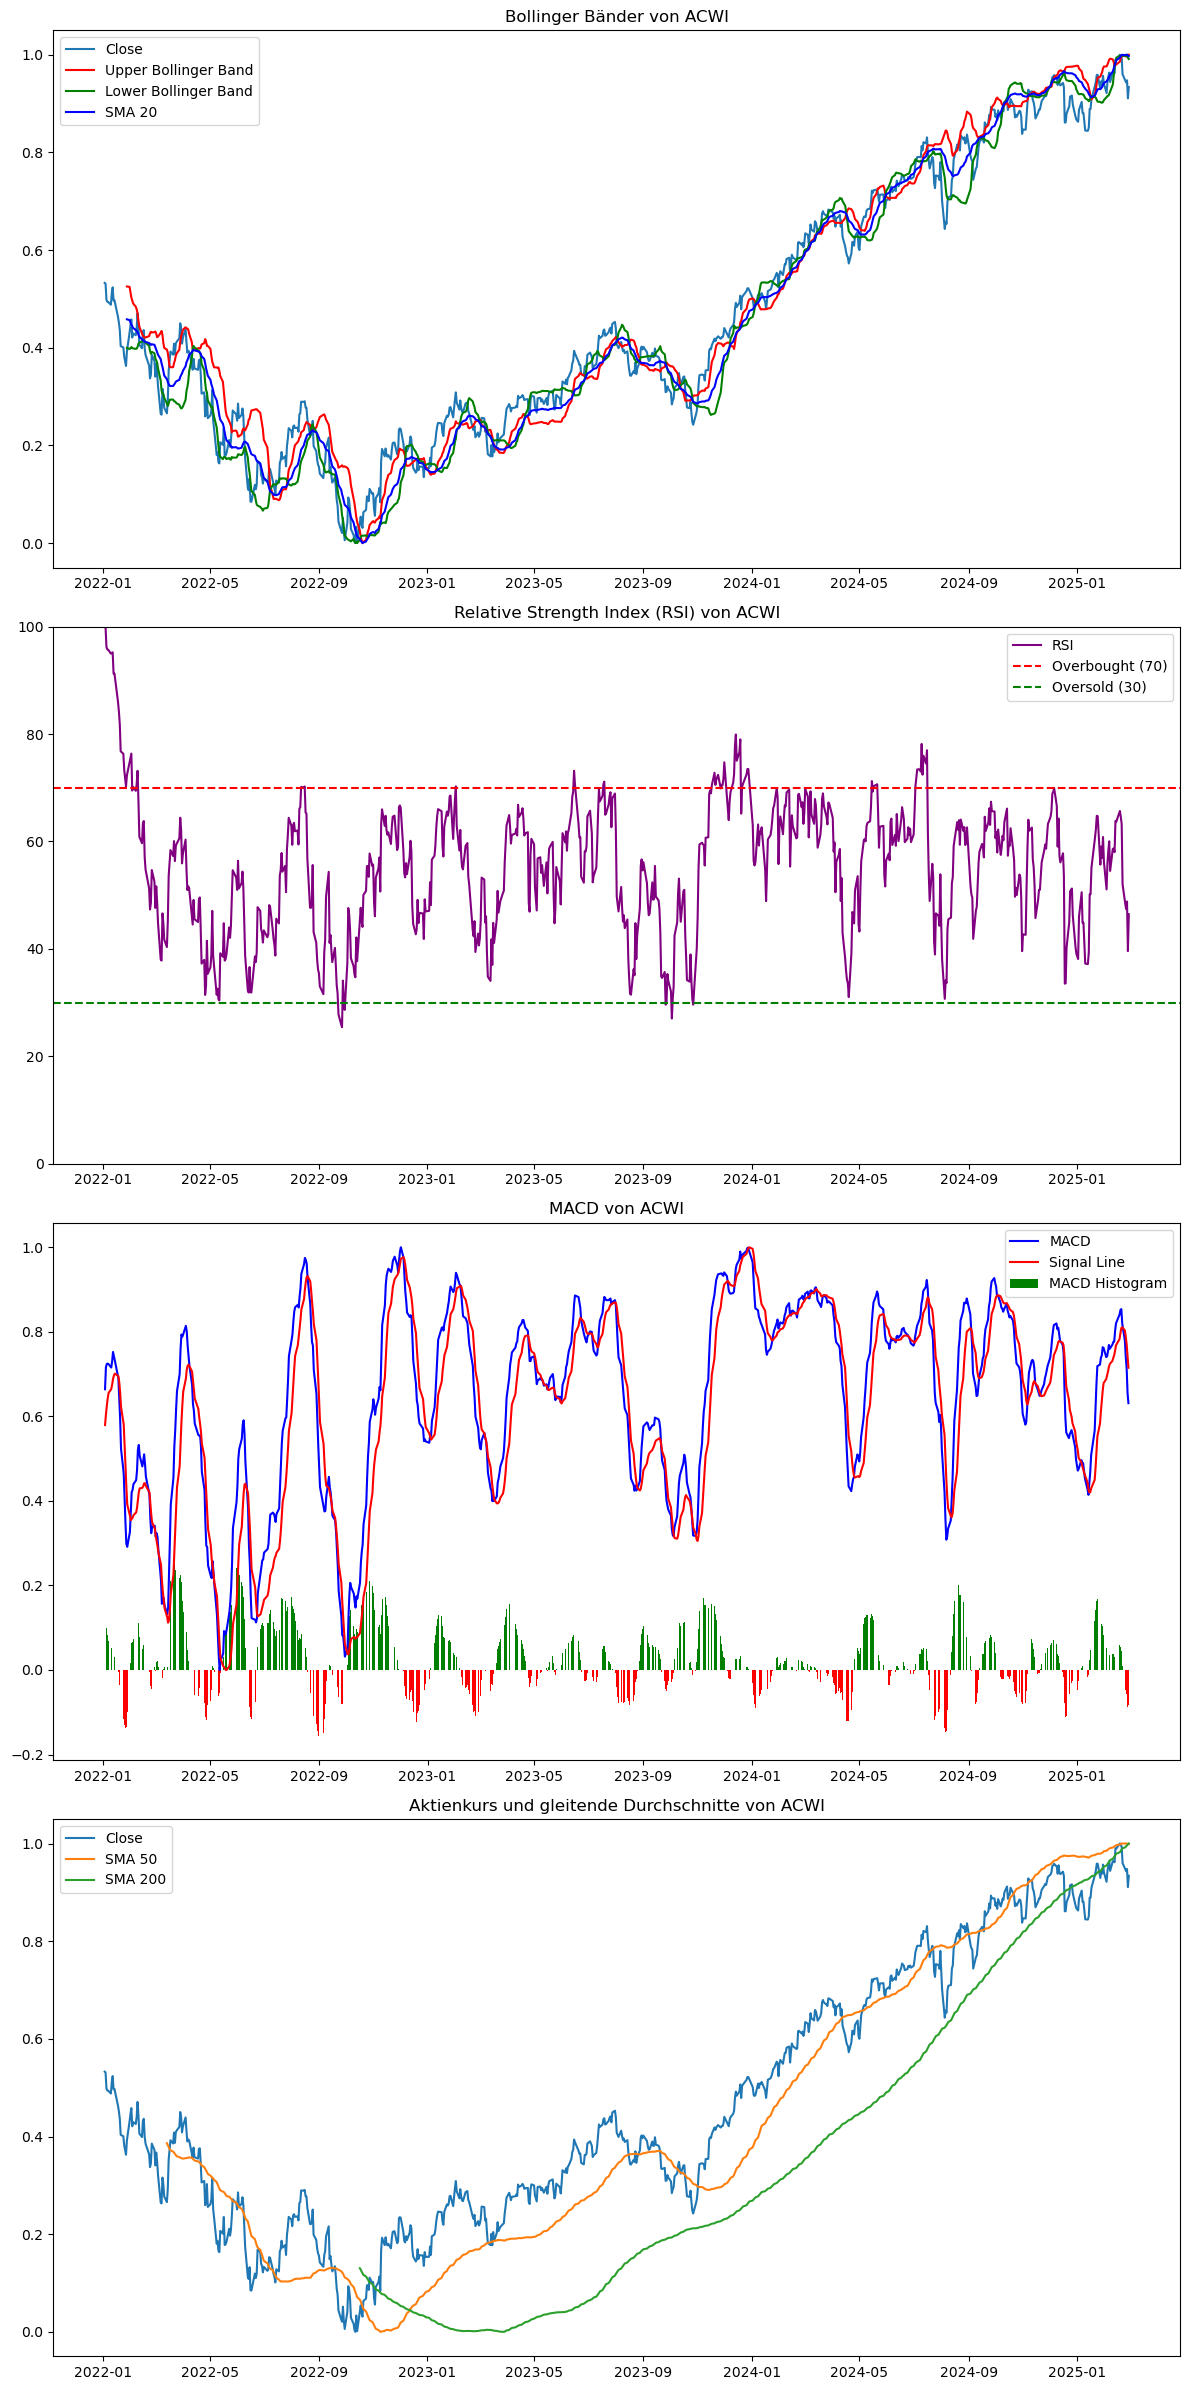

Fehler beim Auswerten von SPY: name 'SPY' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von SPY: name 'SPY' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von SPY: name 'SPY' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von SPY: name 'SPY' is not defined.  Zurückgeben von NaN.
Fehler beim Auswerten von SPY: name 'SPY' is not defined.  Zurückgeben von NaN.


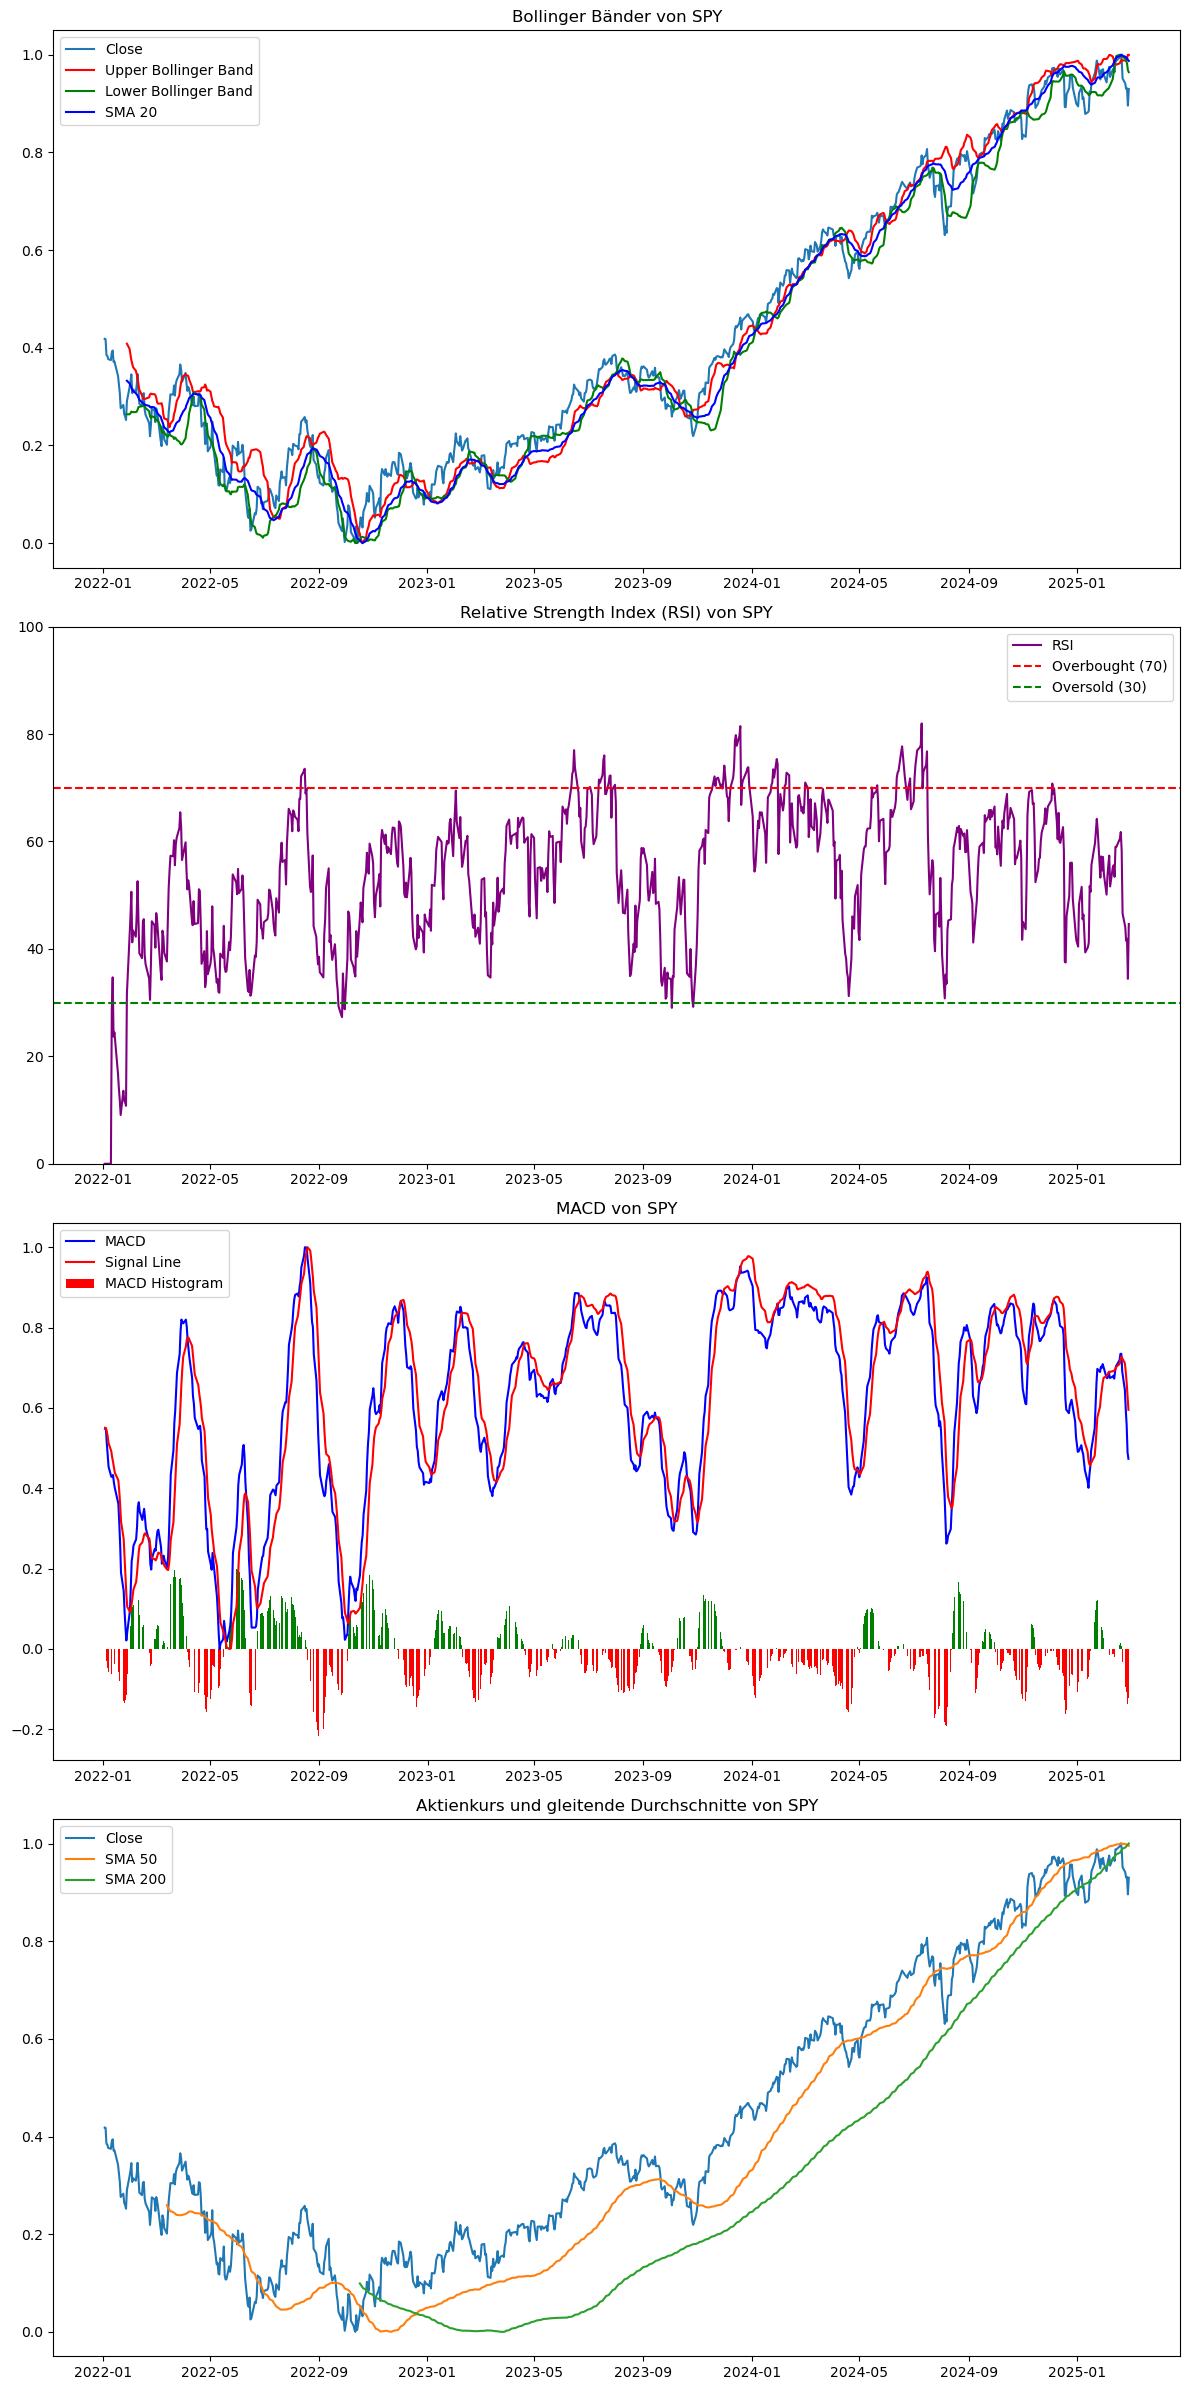

Fehler beim Auswerten von ^GSPC: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^GSPC: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^GSPC: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^GSPC: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^GSPC: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.


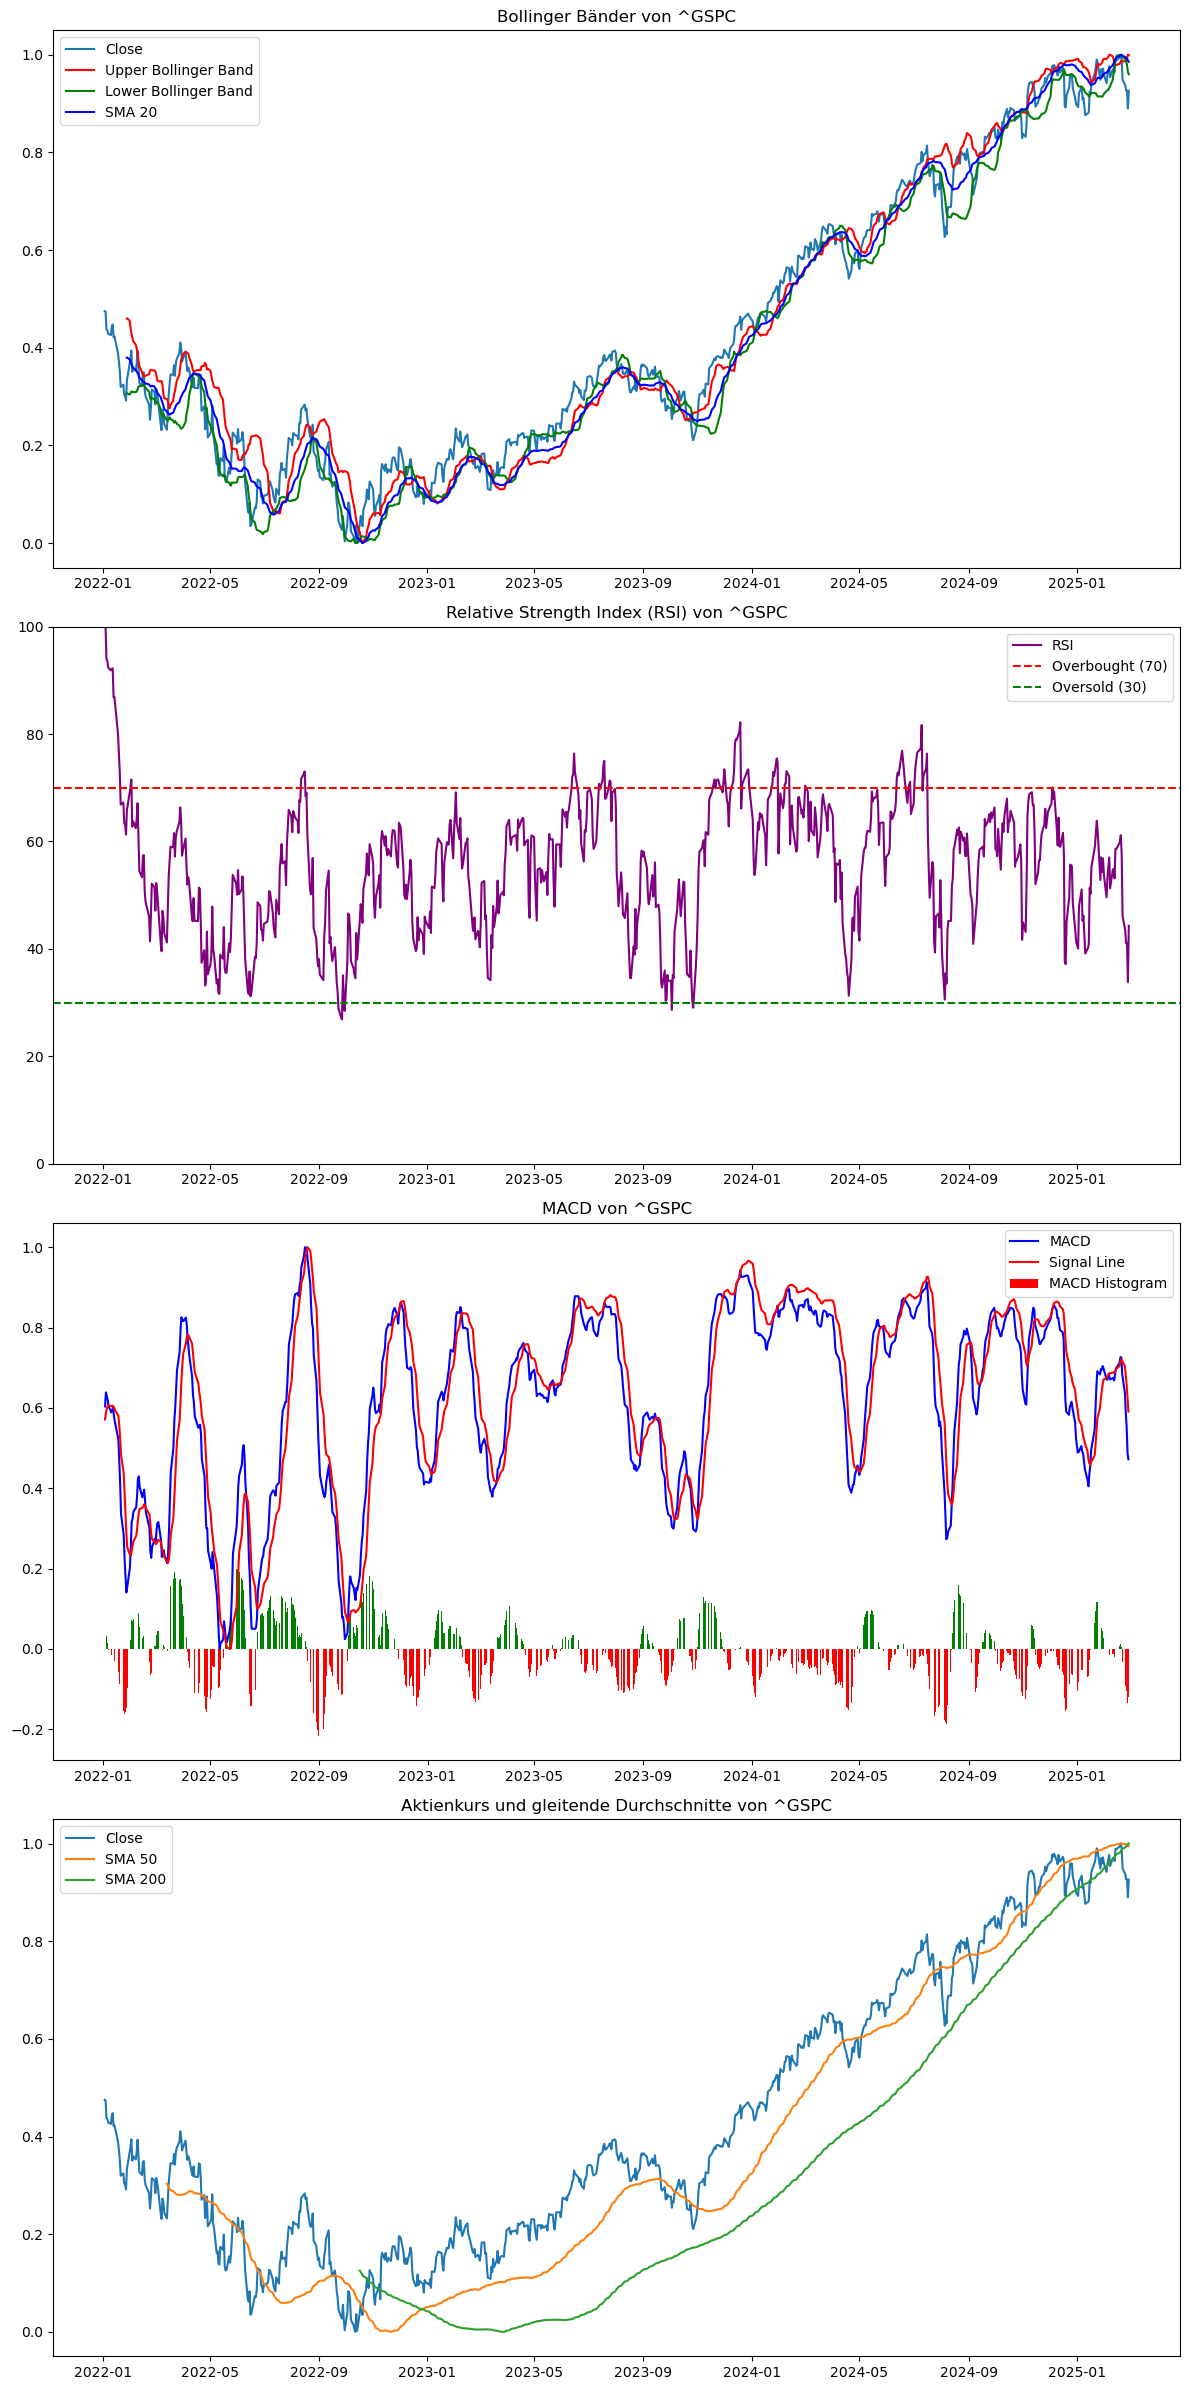

Fehler beim Auswerten von ^DJI: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^DJI: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^DJI: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^DJI: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.
Fehler beim Auswerten von ^DJI: invalid syntax (<unknown>, line 1).  Zurückgeben von NaN.


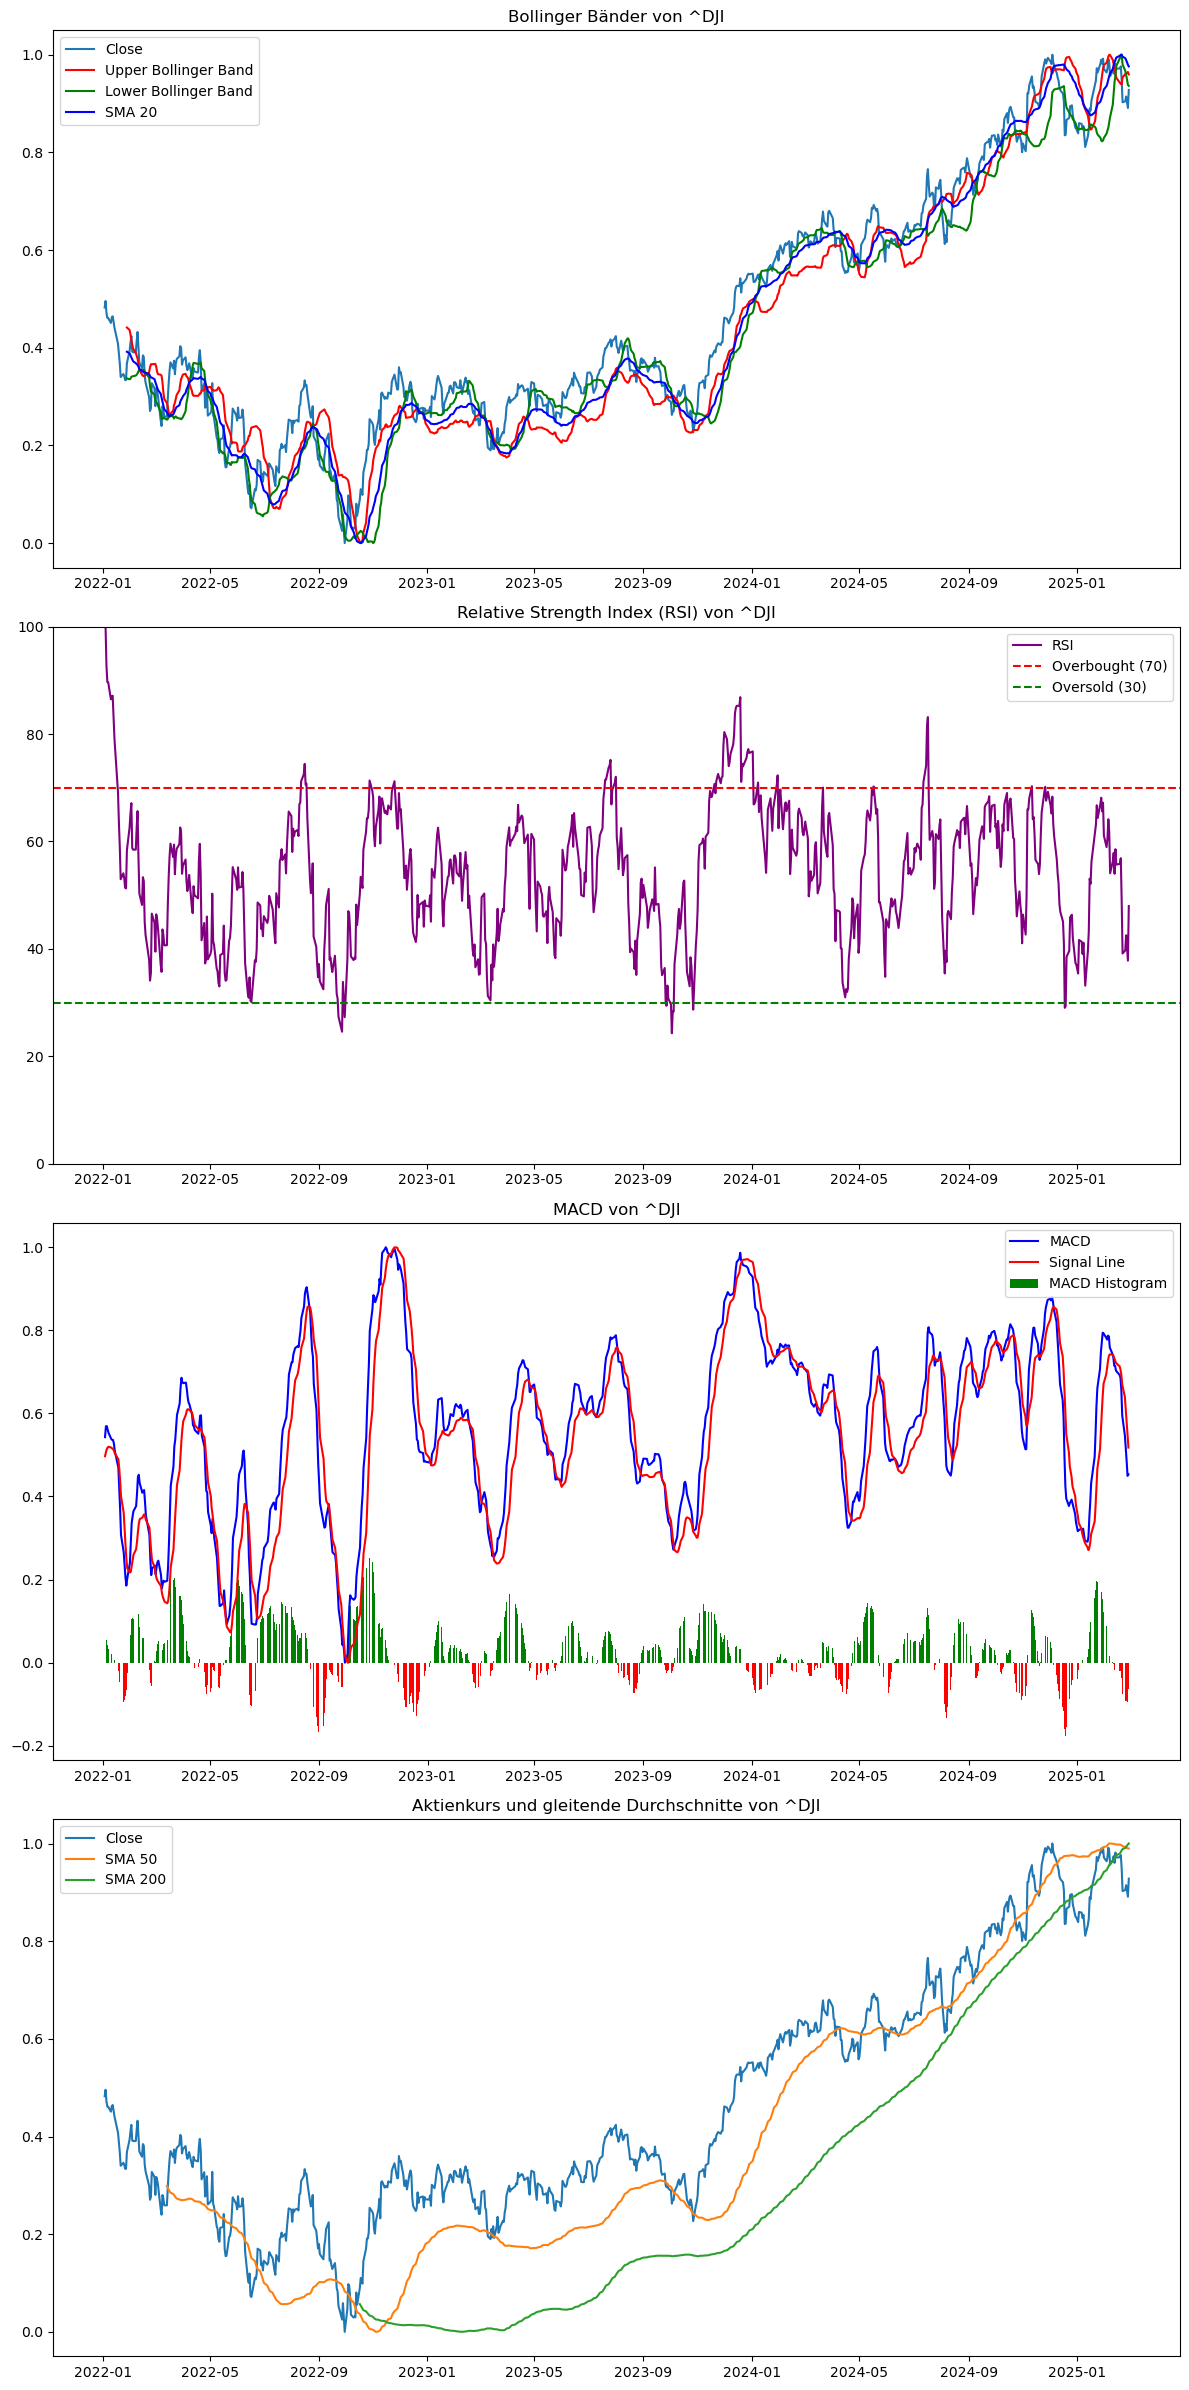

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

def prepare_data(filepath, ticker, asset_type):
    try:
        stock_data = pd.read_csv(filepath, index_col=False, parse_dates=['Date'], thousands=',')
        stock_data.set_index('Date', inplace=True)

        required_cols = ['Volume', 'Open', 'Close', 'High', 'Low']  # Adj Close ist jetzt optional
        for col in required_cols:
            if col not in stock_data.columns:
                print(f"Spalte {col} fehlt in Datei {filepath}")
                return None  # Datei kann nicht verarbeitet werden

        # Adj Close ist optional
        adj_close_exists = 'Adj Close' in stock_data.columns
        if adj_close_exists:
            required_cols.append('Adj Close') # füge es nur hinzu, wenn es existiert

        for col in required_cols:
            if stock_data[col].dtype == object:
                # Versuche, die Werte direkt in float umzuwandeln. Wenn das funktioniert, sind keine Ersetzungen erforderlich.
                try:
                    stock_data[col] = stock_data[col].astype(float)
                except ValueError:
                    # Wenn die direkte Umwandlung fehlschlägt, führe die Ersetzungen durch
                    stock_data[col] = stock_data[col].str.replace('M', '*10**6', regex=False).str.replace('B', '*10**9', regex=False)

                    def safe_eval(x):
                        try:
                            return pd.eval(x)
                        except (SyntaxError, NameError) as e:
                            print(f"Fehler beim Auswerten von {x}: {e}.  Zurückgeben von NaN.")
                            return np.nan

                    stock_data[col] = stock_data[col].apply(safe_eval)  # Jetzt sicher auswerten
            elif not pd.api.types.is_numeric_dtype(stock_data[col]):
                print(f"Spalte {col} hat einen unerwarteten Datentyp: {stock_data[col].dtype}")
                return None

        stock_data.fillna(stock_data.mean(), inplace=True)

        # Entferne NaN-Spalten, *bevor* Feature Engineering
        stock_data = stock_data.dropna(axis=1, how='any')

        # --- Feature Engineering ---
        # Stelle sicher, dass "Close" existiert, bevor du Berechnungen durchführst
        if "Close" in stock_data.columns:
            stock_data["SMA_50"] = stock_data["Close"].rolling(window=50).mean()
            stock_data["SMA_200"] = stock_data["Close"].rolling(window=200).mean()

            # Bollinger Bänder
            stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
            stock_data['StdDev_20'] = stock_data['Close'].rolling(window=20).std()
            stock_data['Upper'] = stock_data['SMA_20'] + 2 * stock_data['StdDev_20']
            stock_data['Lower'] = stock_data['SMA_20'] - 2 * stock_data['StdDev_20']

            # Relative Stärke Index (RSI)
            delta = stock_data['Close'].diff()
            up = delta.clip(lower=0)
            down = -1 * delta.clip(upper=0)
            ema_up = up.ewm(com=13, adjust=False).mean()
            ema_down = down.ewm(com=13, adjust=False).mean()
            rs = ema_up / ema_down
            stock_data['RSI'] = 100 - (100 / (1 + rs))

            # MACD (Moving Average Convergence Divergence)
            stock_data['EMA_12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
            stock_data['EMA_26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
            stock_data['MACD'] = stock_data['EMA_12'] - stock_data['EMA_26']
            stock_data['Signal'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
        else:
            print("Spalte 'Close' fehlt nach dem Bereinigen der Daten. Feature Engineering wird übersprungen.")
            return None

        # --- Datenvorbereitung für das Modell ---
        features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']  # Adj Close entfernt
        if adj_close_exists:
            features_to_scale.append('Adj Close')  # wieder hinzufügen, wenn sie existiert
        feature_engineering_cols = ['SMA_50', 'SMA_200', 'SMA_20', 'StdDev_20', 'Upper', 'Lower', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'Signal'] # Alle Feature Engineering Spalten

        features_to_scale.extend([col for col in feature_engineering_cols if col in stock_data.columns]) # nur die Spalten hinzufügen, die existieren

        # Skaliere *nicht* den RSI!
        if "RSI" in features_to_scale:
            features_to_scale.remove("RSI")

        features_to_scale = [col for col in features_to_scale if col in stock_data.columns]  # Filtere die Liste nochmals, falls Spalten beim Feature Engineering nicht erzeugt wurden
        if features_to_scale:
            scaler = MinMaxScaler()
            stock_data[features_to_scale] = scaler.fit_transform(stock_data[features_to_scale])

        # --- Visualisierung ---
        # Erstelle eine Figure mit Subplots
        fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24)) # Ein Subplot mehr

        # Bollinger Bänder (Matplotlib)
        if "Close" in stock_data.columns and "SMA_20" in stock_data.columns and "Upper" in stock_data.columns and "Lower" in stock_data.columns:
            axes[0].plot(stock_data["Close"], label="Close")
            axes[0].plot(stock_data["Upper"], label="Upper Bollinger Band", color='red')
            axes[0].plot(stock_data["Lower"], label="Lower Bollinger Band", color='green')
            axes[0].plot(stock_data["SMA_20"], label="SMA 20", color='blue')
            axes[0].set_title(f"Bollinger Bänder von {ticker}")
            axes[0].legend()
        else:
            print("Benötigte Spalten für Bollinger Band Plot fehlen.")

        # RSI Plot (Matplotlib)
        if "RSI" in stock_data.columns:
            axes[1].plot(stock_data["RSI"], label="RSI", color='purple')
            axes[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
            axes[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
            axes[1].set_title(f"Relative Strength Index (RSI) von {ticker}")
            axes[1].legend()
            axes[1].set_ylim(0, 100)  # Setze den Y-Achsenbereich auf 0-100
        else:
            print("Spalte 'RSI' fehlt für Plot 2.")

        # MACD Plot (Matplotlib)
        if "MACD" in stock_data.columns and "Signal" in stock_data.columns:
            # Berechne Histogramm
            stock_data['MACD_Histogram'] = stock_data['MACD'] - stock_data['Signal']

            # Definiere Farben basierend auf positiven/negativen Werten
            bar_colors = ['green' if val >= 0 else 'red' for val in stock_data['MACD_Histogram']]

            # Plot MACD, Signal Line und Histogramm mit Farben
            axes[2].plot(stock_data["MACD"], label="MACD", color='blue')
            axes[2].plot(stock_data["Signal"], label="Signal Line", color='red')
            axes[2].bar(stock_data.index, stock_data['MACD_Histogram'], label='MACD Histogram', color=bar_colors)  # Verwende bar plot für Histogramm

            axes[2].set_title(f"MACD von {ticker}")
            axes[2].legend()
        else:
            print("Entweder Spalte 'MACD' oder 'Signal' fehlt für Plot 3.")

        # SMA Plot
        if "Close" in stock_data.columns:
            axes[3].plot(stock_data["Close"], label="Close")
            if "SMA_50" in stock_data.columns:
                axes[3].plot(stock_data["SMA_50"], label="SMA 50")
            if "SMA_200" in stock_data.columns:
                axes[3].plot(stock_data["SMA_200"], label="SMA 200")
            axes[3].set_title(f"Aktienkurs und gleitende Durchschnitte von {ticker}")
            axes[3].legend()
        else:
            print("Spalte 'Close' fehlt für Plot 4.")

        plt.tight_layout()  # verhindert Überlappungen der Subplots
        plt.show()

        # --- Daten speichern ---
        output_folder = "financial_data"  # Definieren Sie den Ausgabeordner
        prepared_filename = f"prepared_{ticker.replace('^', '')}_{asset_type.lower()}_data.csv"
        stock_data.to_csv(os.path.join(output_folder, prepared_filename)) #  os.path.join verwenden

    except FileNotFoundError:
        print(f"Fehler: Datei '{filepath}' nicht gefunden.")
        return None
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
        return None

    return stock_data


# --- Hauptteil des Skripts ---

output_folder = "financial_data"
tickers = {
    "Stocks": ["AAPL", "MSFT", "GOOG"],
    "ETFs": ["ACWI", "SPY"],
    "Indices": ["^GSPC", "^DJI"],
}

prepared_data = None # Initialize prepared_data to None

for asset_type, ticker_list in tickers.items():
    for ticker in ticker_list:
        filename = f"{ticker}_{asset_type.lower()}_data.csv"
        filepath = os.path.join(output_folder, filename) # output_folder verwenden

        prepared_data = prepare_data(filepath, ticker, asset_type)  # asset_type übergeben
        if prepared_data is None:
            print(f"Fehler beim Vorbereiten der Daten für {ticker}. Fortfahren mit dem nächsten Ticker.")
            continue # Skip to the next ticker if preparation fails

if prepared_data is not None:
    try:
        prepared_data.to_excel("prepared_data.xlsx")  # Als Excel-Datei speichern
    except Exception as e:
        print(f"Fehler beim Schreiben in Excel: {e}")